In [99]:
from PIL import Image
from torchvision import transforms

def load_data(dataset_path, num_workers=0, batch_size=128):
    data = []
    transform = transforms.ToTensor()
    from os import listdir
    from os.path import isfile, join
    triangles = [join(dataset_path+"/triangle/", f) for f in listdir(dataset_path + "/triangle/") if isfile(join(dataset_path+"/triangle/", f)) and f.startswith('.')==False]
    squares = [join(dataset_path+"/square/", f) for f in listdir(dataset_path + "/square/") if isfile(join(dataset_path+"/square/", f)) and f.startswith('.')==False ] 
    stars = [join(dataset_path+"/star/", f) for f in listdir(dataset_path + "/star/") if isfile(join(dataset_path+"/star/", f)) and f.startswith('.')==False ]
    circles = [join(dataset_path+"/circle/", f) for f in listdir(dataset_path + "/circle/") if isfile(join(dataset_path+"/circle/", f)) and f.startswith('.')==False ]
    for i in triangles:
        image = Image.open(i)
        tup = (transform(image), 0)
        data.append(tup)
    for i in squares:
        image = Image.open(i)
        tup = (transform(image), 1)
        data.append(tup)
    for i in stars:
        image = Image.open(i)
        tup = (transform(image), 2)
        data.append(tup)
    for i in circles:
        image = Image.open(i)
        tup = (transform(image), 3)
        data.append(tup)
    return data


In [100]:
import torch

class ClassificationLoss(torch.nn.Module):
    def forward(self, input, target):
        m = torch.nn.LogSoftmax(dim=1)
        loss = torch.nn.NLLLoss()
        return loss(m(input), target)


class LinearClassifier(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = torch.nn.Linear(1 * 200 * 200, 4)
        torch.nn.init.normal_(self.linear1.weight, std=0.01)
        torch.nn.init.normal_(self.linear1.bias, std=0.01)

    def forward(self, x):
        return self.linear1(x.view((x.size(0),-1)))

model_factory = {'linear': LinearClassifier}
model = model_factory['linear']()

train_data = load_data("/Users/shivam/Downloads/archive/shapes/")
ten = []
lab = []
for p in range(len(train_data)):
    i, lb = train_data[p]
    lab.append(lb)
    ten.append(i)
inp = torch.stack(ten, dim=0)
print(inp.shape)
labels = torch.Tensor(lab).to(torch.int64)


nepoch = 5
batch_size = 100
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.9,weight_decay=1e-4)
loss = ClassificationLoss()

for epoch in range(nepoch):
    permutation = torch.randperm(len(train_data))
    for itr in range(0, len(permutation) - batch_size + 1, batch_size):
        batch_samples = permutation[itr:itr + batch_size]
        batch_data, batch_label = inp[batch_samples], labels[batch_samples]
        loss_val = loss(model(batch_data), batch_label.to(dtype=torch.int64))
        optimizer.zero_grad()
        loss_val.backward()
        optimizer.step()
    print('Epoch : ', epoch, ' Loss : ', float(loss_val))

torch.Size([14949, 1, 200, 200])
Epoch :  0  Loss :  0.09288325160741806
Epoch :  1  Loss :  0.0018254071474075317
Epoch :  2  Loss :  0.0
Epoch :  3  Loss :  0.06690317392349243
Epoch :  4  Loss :  0.2707478404045105


 Label :  3


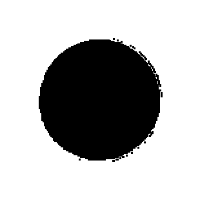

In [104]:
#2,50,120,200
name="200.png"
from torchvision import transforms
transform = transforms.ToTensor()
image = transform(Image.open("/Users/shivam/Downloads/archive/shapes/test/" + name))
ten = []
ten.append(image)
inp = torch.stack(ten, dim=0)
# 0 - Triangle
# 1 - Square
# 2 - Star
# 3 - Circle
print(" Label : ", torch.argmax(model(inp)).numpy())
Image.open("/Users/shivam/Downloads/archive/shapes/test/" + name)
